# Random Forest - Connie

## Import Packages

In [1]:
import helper_RF as l
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import SCORERS
import warnings
warnings.filterwarnings('ignore') 

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler       # scaling data
from sklearn.neighbors import KNeighborsRegressor    # regressor
from sklearn.model_selection import GridSearchCV     # for grid search
from sklearn.pipeline import make_pipeline           # for making pipelines
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## Import Data

In [3]:
#copy from the main file
import math
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns # for visualiation
import matplotlib.pyplot as plt # plotting
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
import altair as alt
alt.renderers.enable('notebook')

df = pd.read_csv('./facebook_with_reactions.csv')
outcomes = df[['Rating']]

## drop useless columns 
df = df.drop(columns=['Debate', 'status_link', 'permalink_url', 'Post URL', 
                      'status_message', 'link_name', 'share_count', 'Unnamed: 0', 'account_id',
                      'status_id', 'status_type', 'status_published'])

## remove spaces in columns
df.columns = [c.replace(' ', '_') for c in df.columns]

## Create copy of data for modeling
model_data = df.copy()

## change Rating to numeric for classification
model_data.Rating = model_data.Rating.replace(['mostly false', 'no factual content', 'mixture of true and false', 'mostly true'], [0,1,2,3]).astype(int)
model_data = model_data.drop(columns=['post_id', 'reaction_count'])
#model_data = model_data.drop(columns=['Date_Published_2016-09-20','Date_Published_2016-09-21',
#                                     'Date_Published_2016-09-22','Date_Published_2016-09-23',
#                                     'Date_Published_2016-09-26','Date_Published_2016-09-27'])
## make dummy columns (make categories numeric)
model_data = pd.get_dummies(model_data)

In [3]:
#save model_data as csv file
model_data.to_csv("./model_data.csv")

In [4]:
#transfer the model data to one with attributes
# and other with only the response (target), which is "Rating"
df_target=model_data['Rating']
df_dropped=model_data
df_dropped=df_dropped.drop(columns=['Rating'])

## Null Values

In [5]:
#propagate non-null values forward, given that we do have null values in the dataset
df_dropped.fillna(method='ffill',inplace=True)

# Select Variables

In [6]:
#this gives a complet list of variables
list(model_data.columns.values) 

['Rating',
 'comment_count',
 'num_reactions',
 'num_comments',
 'num_shares',
 'num_likes',
 'num_loves',
 'num_wows',
 'num_hahas',
 'num_sads',
 'num_angrys',
 'Category_left',
 'Category_mainstream',
 'Category_right',
 'Page_ABC News Politics',
 'Page_Addicting Info',
 'Page_CNN Politics',
 'Page_Eagle Rising',
 'Page_Occupy Democrats',
 'Page_Politico',
 'Page_Right Wing News',
 'Page_The Other 98%',
 'Date_Published_2016-09-19',
 'Date_Published_2016-09-20',
 'Date_Published_2016-09-21',
 'Date_Published_2016-09-22',
 'Date_Published_2016-09-23',
 'Date_Published_2016-09-26',
 'Date_Published_2016-09-27',
 'Post_Type_link',
 'Post_Type_photo',
 'Post_Type_text',
 'Post_Type_video']

In [7]:
#this function gives the selected features, using Extra-Tree classifier
df_selected_1=l.feature_selection(df_dropped,df_target,model_data)

['num_comments', 'num_reactions', 'num_likes', 'comment_count', 'num_shares']


In [8]:
#take a look at the selected df
df_selected_1.describe()

,num_comments,num_reactions,num_likes,comment_count,num_shares
count,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000
mean,452.082179,5296.478763,4067.789935,441.455217,3834.459834
std,1510.787707,18159.453476,14940.861709,1324.224921,22345.925304
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,115.000000,78.000000,34.000000,18.000000
50%,118.500000,480.000000,297.000000,126.500000,76.000000
75%,374.000000,2211.500000,1466.250000,386.000000,556.000000
max,35799.000000,330144.000000,280694.000000,32419.000000,401465.000000


## Split Data

In [9]:
#Split Data as training and test, with size of 0.8 and 0.2

#df_selected=selecting the ideal cols

#df_target=with the outcome

train_features,test_features,train_outcome,test_outcome=train_test_split(
    df_selected_1,
    df_target,
    test_size=0.20,
    random_state=11,
)

## Grid Search

{'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 7}


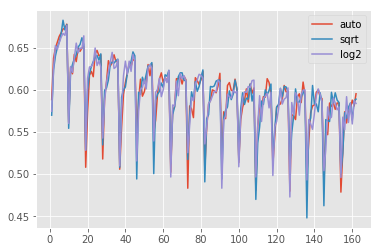

In [10]:
#dropped is the dataframe with numeric values
#selected is the one with all the selected variables

l.model_selection_random_forest(df_selected_1,df_target,train_features,train_outcome)

## Model Fitting

In [11]:
#fill in all the best parameters
w=50
best_model_1=RandomForestClassifier(bootstrap='true',max_features='auto',min_samples_split=75,n_estimators=8,class_weight={0: 1, 1: w,2:w,3:w})
best_model_1.fit(train_features,train_outcome) #79.7


RandomForestClassifier(bootstrap='true',
            class_weight={0: 1, 1: 50, 2: 50, 3: 50}, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=75,
            min_weight_fraction_leaf=0.0, n_estimators=8, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Graphs

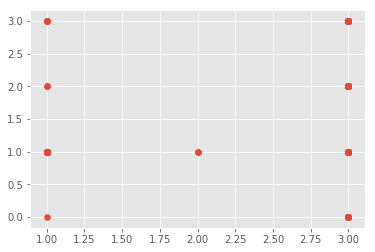

In [13]:
plt.scatter(best_model_1.predict(test_features),test_outcome)

## Cross Validation

In [14]:
#cross validation by our best model
l.cross_val(test_features,test_outcome,best_model_1)

0.7601479915433403

In [15]:
#see the accuracy score
accuracy_score(test_outcome, best_model_1.predict(test_features))

0.804147465437788

In [16]:
#see the predictions
best_model_1.predict(test_features)

array([3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 1, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 1, 1, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3,

In [17]:
#the result of confusion matrix
from sklearn.metrics import confusion_matrix
y_pred=best_model_1.predict(test_features)
confusion_matrix(test_outcome, y_pred)

array([[  0,   1,   0,  12],
       [  0,  20,   2,  27],
       [  0,   2,   0,  36],
       [  0,   5,   0, 329]])

In [18]:
#the F1 score, 
from sklearn.metrics import f1_score
f1_score(test_outcome, y_pred,average="weighted")

0.7448124041357714